In [304]:
import pandas
import glob
import re

In [305]:
reg = re.compile('/home/gdholla1/data/daphne/registration/(?P<mask_type>.*)_tsnr_values/(?P<filtered>.*)/_mask_(?P<mask>.*)_subject_id_S(?P<subject_id>.*)/_interp_(?P<interpolation>.*)/_tsnr_.*/run(?P<run>.*)_dtype_mcf_mask_gms_tempfilt_maths_tsnr_ts.txt')

fns = glob.glob('/home/gdholla1/data/daphne/registration/*_tsnr_values/*/_mask_*_subject_id_S*/_interp_*/_tsnr_*/run*.txt')

df = []

for fn in fns:
    df.append(reg.match(fn).groupdict())
    df[-1]['tsnr'] = np.loadtxt(fn)
    
    if df[-1]['tsnr'] == 0:
        df[-1]['tsnr'] = np.nan
        
    

In [306]:
df = pandas.DataFrame(df)

In [307]:
df.subject_id.unique()

array(['16', '07', '04', '03', '13', '11', '09', '01', '00', '06', '08',
       '02'], dtype=object)

In [308]:
import seaborn as sns

In [309]:
sns.set_context('talk')
sns.set_style('whitegrid')

In [310]:
df.head()

,filtered,interpolation,mask,mask_type,run,subject_id,tsnr
0,unfiltered,nearestneighbour,LC_R,disjunct,3,16,37.52902285
1,unfiltered,nearestneighbour,LC_R,disjunct,1,16,40.70865504
2,unfiltered,nearestneighbour,LC_R,disjunct,2,16,36.58071772
3,unfiltered,trilinear,LC_R,disjunct,3,16,41.56752863
4,unfiltered,trilinear,LC_R,disjunct,1,16,38.3502634


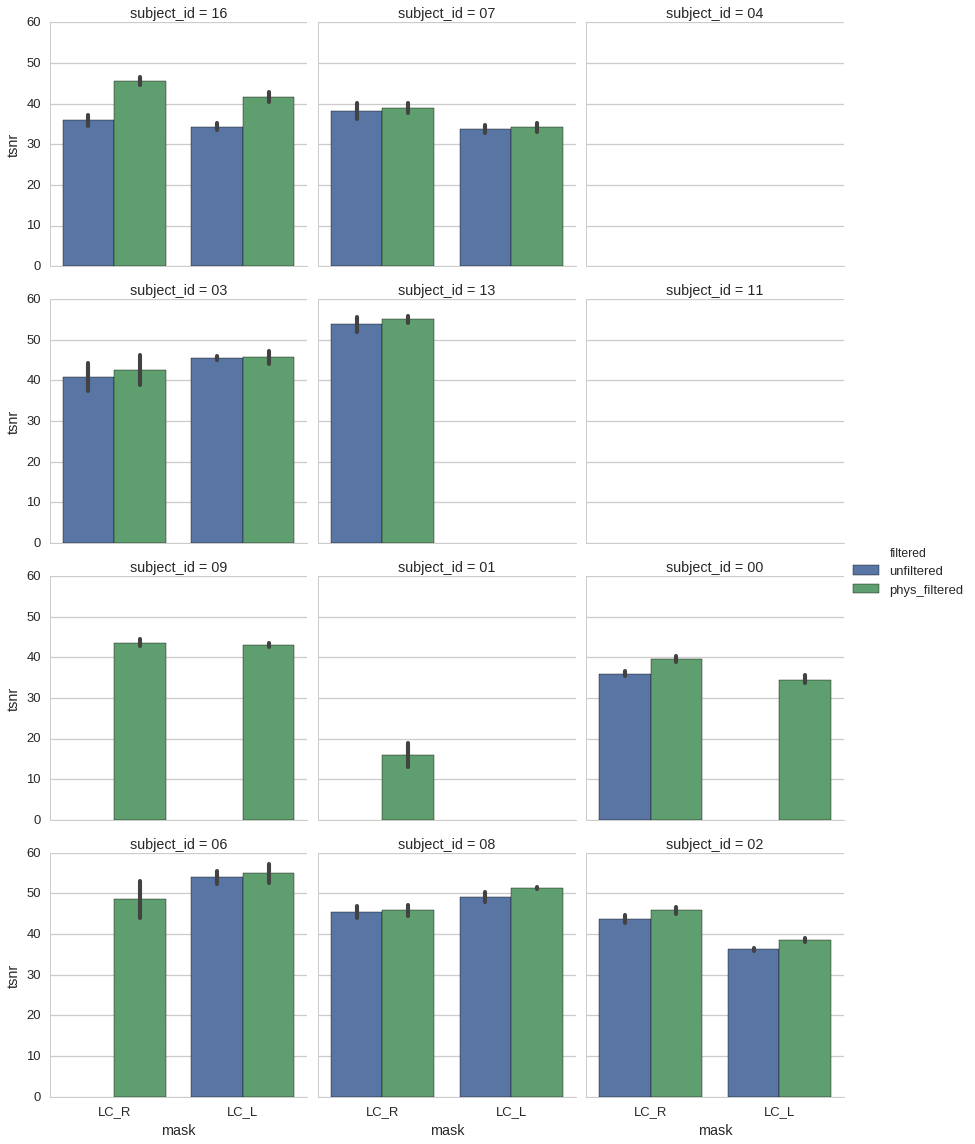

In [311]:
sns.factorplot('mask', 'tsnr', 'filtered', df[(df.interpolation == 'nearestneighbour') & (df.mask_type == 'conjunct')], col='subject_id', col_wrap=3, kind='bar', ci=67)
# plt.tight_layout()

In [112]:
import subprocess

In [121]:
get_volume('/home/gdholla1/data/daphne/registration/disjunct_masks/_mask_LC_L_subject_id_S02/_interp_trilinear/LC_L_disjunct_flirt.nii.gz')

10.607564

In [117]:
output

'1 10.607564 \n'

In [125]:
import os

In [157]:
tmp = []

for i, row in df.iterrows():
    subject_id, mask, interpolation, mask_type = row['subject_id'], row['mask'], row['interpolation'], row['mask_type']
#     print subject_id, mask, interpolation, mask_type
    
    fn = '/home/gdholla1/data/daphne/registration/{mask_type}_masks/_mask_{mask}_subject_id_S{subject_id}/_interp_{interpolation}/{mask}_{mask_type}_flirt.nii.gz'.format(**locals())
    assert(os.path.exists(fn))
    
    tmp.append(fn)
    
df['fn'] = tmp

In [158]:
def get_volume(mask):
    output = subprocess.Popen(["fslstats", mask, "-V"], stdout=subprocess.PIPE).communicate()[0]
    return float(output.split()[1])

In [159]:
df['volume'] = df.fn.apply(get_volume)

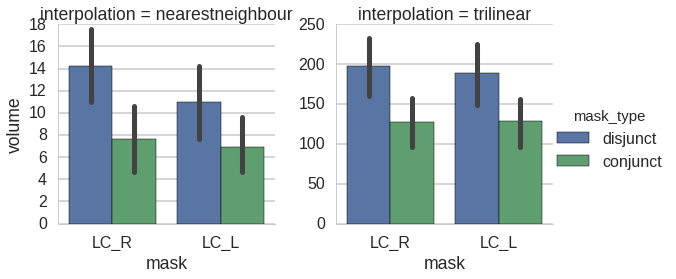

In [160]:
sns.factorplot('mask', 'volume', 'mask_type', df, col='interpolation', kind='bar', sharey=False)

In [165]:
df.groupby(['mask', 'interpolation', 'mask_type']).apply(lambda x: (x.volume == 0).sum())

mask  interpolation     mask_type
LC_L  nearestneighbour  conjunct     14
                        disjunct     11
      trilinear         conjunct      9
                        disjunct      6
LC_R  nearestneighbour  conjunct     15
                        disjunct      6
      trilinear         conjunct      9
                        disjunct      6
dtype: int64

In [ ]:
reg = re.compile('/home/gdholla1/data/daphne/registration/conjunct_tsnr_phys_values/')

fns = glob.glob('/home/gdholla1/data/daphne/registration/*_tsnr_values/_mask_*_subject_id_S*/_interp_*/_tsnr_*/run*.txt')

df = []

for fn in fns:
    df.append(reg.match(fn).groupdict())
    df[-1]['tsnr'] = np.loadtxt(fn)
    
    if df[-1]['tsnr'] == 0:
        df[-1]['tsnr'] = np.nan
        
    

In [235]:
filtered = np.loadtxt('/home/gdholla1/data/daphne/registration/extracted_signal_disjunct/phys_filtered/_mask_LC_L_subject_id_S00/_interp_nearestneighbour/_extract_signal_phys_disjunct2/run3_maths_maths_maths_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt')
unfiltered = np.loadtxt('/home/gdholla1/data/daphne/registration/extracted_signal_disjunct/unfiltered/_mask_LC_L_subject_id_S00/_interp_nearestneighbour/_extract_signal_disjunct2/run3_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt')

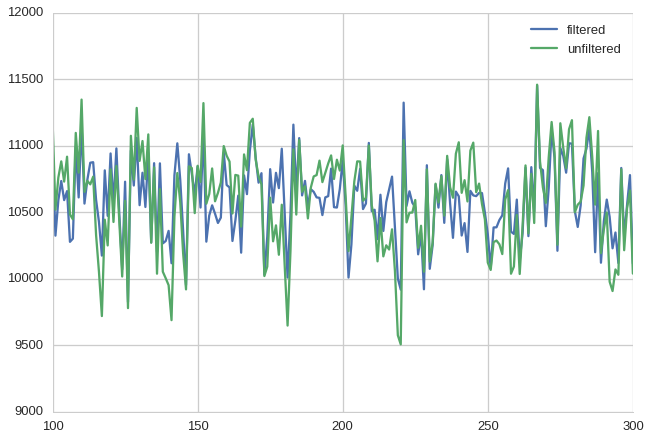

In [236]:
plt.plot(filtered, label='filtered')
plt.plot(unfiltered, label='unfiltered')
plt.xlim(100, 300)
plt.legend()
sns.despine()

In [239]:
unfiltered.mean() / unfiltered.std()

30.649619059713743

In [238]:
filtered.mean() / filtered.std()

35.124456522063667

In [249]:
!ls /home/gdholla1/data/daphne/preprocess_phys/motion_regressors_filtered_files/

_subject_id_S00  _subject_id_S02  _subject_id_S06


In [237]:
sp.stats.pearsonr(unfiltered, filtered)

(0.85096162393034924, 1.1441385656629767e-279)